In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

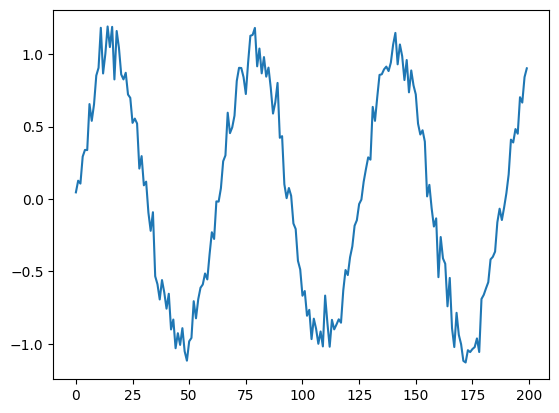

In [ ]:

series=(np.sin(0.1*np.arange(200)))+np.random.randn(200)*0.1
plt.plot(series)

In [ ]:

T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T,1)#data should be N*T*D
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)

(190, 10, 1) (190,)


In [ ]:
# model
i=Input(shape=(T,1))
x=SimpleRNN(5,activation=None)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1)

)

In [ ]:
#training the model

r=model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[:-N//2],Y[:-N//2]),epochs=80)

Epoch 1/80
3/3 [==============================] - 1s 127ms/step - loss: 0.8362 - val_loss: 0.7320
Epoch 2/80
3/3 [==============================] - 0s 22ms/step - loss: 0.6837 - val_loss: 0.5966
Epoch 3/80
3/3 [==============================] - 0s 21ms/step - loss: 0.5558 - val_loss: 0.4873
Epoch 4/80
3/3 [==============================] - 0s 29ms/step - loss: 0.4576 - val_loss: 0.3991
Epoch 5/80
3/3 [==============================] - 0s 26ms/step - loss: 0.3778 - val_loss: 0.3297
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 0.3096 - val_loss: 0.2769
Epoch 7/80
3/3 [==============================] - 0s 29ms/step - loss: 0.2633 - val_loss: 0.2364
Epoch 8/80
3/3 [==============================] - 0s 22ms/step - loss: 0.2267 - val_loss: 0.2062
Epoch 9/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1965 - val_loss: 0.1845
Epoch 10/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1774 - val_loss: 0.1688
Epoch 11/80
3/3 [===========

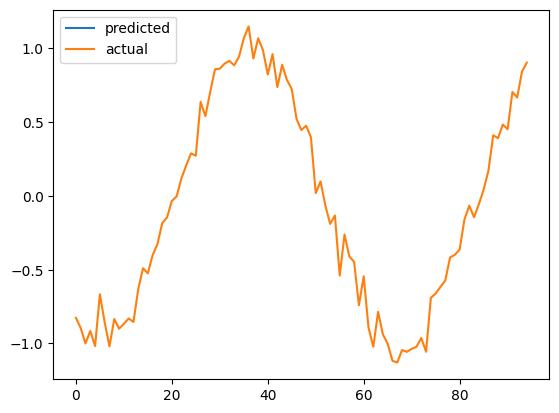

In [ ]:
#incorrect method to  forecast using true target
validation_target=Y[-N//2:]
validation_predict=[]
#last train input
i=-N//2
while len(validation_predict)<len(validation_predict):#scalar
 p=model.predict(X[i].reshape(1,-1,1))[0,0]#model.predict returns NXk output where N=1,K=1
 i+=1
 validation_predict.append(p)

plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="actual")
plt.legend()

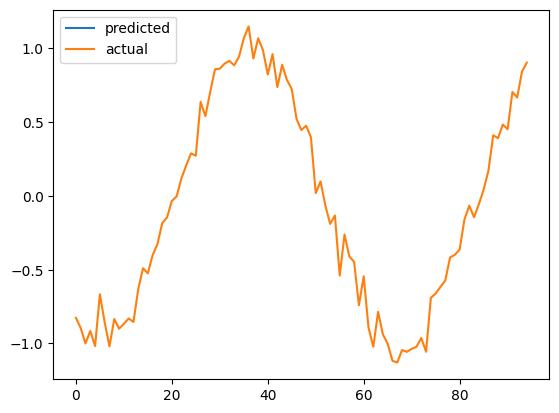

In [ ]:
#correct method to  forecast using true target
validation_target=Y[-N//2:]
validation_predict=[]
#last train input
last_x=X[-N//2]
while len(validation_predict)<len(validation_predict):#scalar
 p=model.predict(last_x.reshape(1,-1,1))[0,0]#model.predict returns NXk output where N=1,K=1
 validation_predict.append(p)
 last_x=np.roll(last_x,-1)
 last_x[-1]=p

plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="actual")
plt.legend()

In [ ]:
#note that RNN with noise works better than autoregressive model
#if some code is lost check out collab notebook
https://colab.research.google.com/drive/1pR51qznF2b6Cn31bie3IE8NwPVSfhYIg